# Data Understanding

In [1]:
# pip install "numpy>=1.16.5,<1.23.0

In [2]:
# pip install spacy

In [3]:
# pip install pdfplumber

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import classification_report, accuracy_score


In [5]:
# load the spacy English model
# import en_core_web_sm
# nlp = en_core_web_sm.load()
#nlp = spacy.load('en_core_web_sm')
from spacy.lang.en import English
nlp=English()

In [6]:
# Loading our resume datatset with pandas
resumedf= pd.read_csv('UpdatedResumeDataSet.csv')
resumedf

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [7]:
resumedf.shape

(962, 2)

In [8]:
#Lets see how many different industries there are
resumedf.Category.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

Our dataset has 961 resumes all from different industries


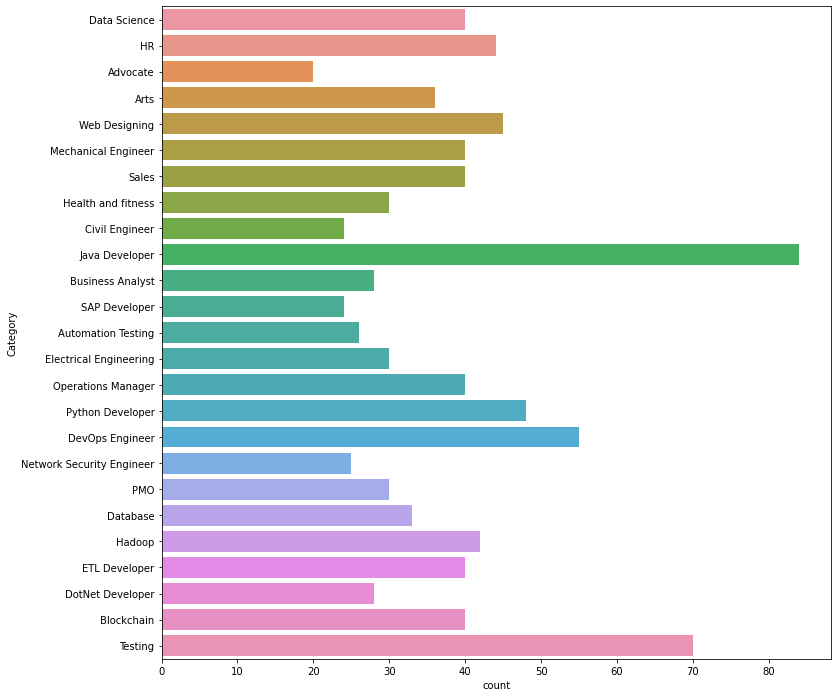

In [9]:
# TO visualise the above
plt.figure(figsize=(12,12))
sns.countplot(y="Category", data = resumedf)
plt.show;

The field with the most resumes in our dataset is a Java developer

In [10]:
# Lets check the first Data Science resume
resumedf['Resume'][0]


'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# Preprocessing 

In [11]:
# Defining a function to clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text) # to remove extra white space
    text = re.sub(r'[^\w\s]', '', text) # to remove all non-word characters 
    text = re.sub(r'[^\x00-\x7f]',r' ', text) # to remove anything that is not within the ASCII range 
    return text

# Apply cleaning function 
resumedf['cleaned_resume'] = resumedf['Resume'].apply(clean_text)
resumedf


,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas nu...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 to may 2017 be uitr...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skills proficient in ms office word...
958,Testing,â Willingness to accept the challenges. â ...,willingness to accept the challenges posit...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skills quick learner eagerness to...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge mspower po...


# Feature Extraction


In [12]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(resumedf['cleaned_resume'])

# Transform resume texts
resume_tfidf = vectorizer.transform(resumedf['cleaned_resume'])

# Modeling

In [13]:
# We need to pick our features and labels 
X = resume_tfidf
y = resumedf['Category']

# Lets split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Evaluate model 
y_pred = clf.predict(X_test)
# print(classification_report(y_test, y_pred))

lr_accuracy = accuracy_score(y_test, y_pred)
print(lr_accuracy)

0.9948186528497409


In [17]:
X_train.shape

(769, 8104)

In [15]:
import pickle
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
# # Save Random Forest model
# with open('rf_classifier.pkl', 'wb') as f:
#     pickle.dump(rf_clf, f)

# Save Logistic Regression model
with open('classifier.pkl', 'wb') as f:
    pickle.dump(clf, f)